In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#3 rows deleted:
#20484	,RegEx used to extract tokens from an ASCIIMath expression"	11		1	0	0	https://i.stack.imgur.com/6VcaB.png									0	1		0	0	0	0	0	1	0	0	0	1	1	0	0	0	0	0
#71350	,Bootstrap modal wont trigger on mobile"	443	Lake Mary, FL, United States	85	165	11	https://i.stack.imgur.com/TLzJW.png?s=128&g=1									0	1		0	0	0	0	0	3	0	0	0	1	1	0	0	0	0	0
#60036	<p>from group ""Value"" i can get the value of hour and it gives output as 1	3	2	4	5	6 and so on for each generator name but since no of hour is common to all i need that i get it only once that is i should get 1	2	5	6 only once</p>							0	1		0	0	0	0	0	1	0	0	0	1	1	0	1	0	0	0

openCloseData=pd.read_csv("openCloseData9.csv")
openCloseData.head()

,Unnamed: 0,AboutMe,Body,Comment,Downvotes,Location,PostId,ProfileImageUrl,Reputation,SOUrlCount,...,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled,websiteUrlFilled
0,0,NaN,<p>Please someone explain complete step by ste...,100,0,NaN,32203002,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,0,0,6,0.0,2,-110.462467,33,0,1,0
1,1,NaN,<p>I've used SFST language for my project on N...,100,0,NaN,31961877,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,3,0,27,0.0,4,-157.135019,25,2,1,0
2,2,<p>Currently a software developer at HiQ Finla...,<p>The following JSON is returned from SharePo...,100,2413,"Helsinki, Finland",22080350,https://i.stack.imgur.com/w2whQ.png,33857,0,...,0,0,25,0.0,3,-279.862500,134,0,4,1
3,3,<p>Love the computer science &amp; technology ...,<p>What's the benifit of allocating a chunk of...,100,3,中国Shanghai Shi,28019349,https://www.gravatar.com/avatar/a33ac21cad99e5...,1470,0,...,0,0,10,0.0,5,-234.970000,78,0,3,0
4,4,NaN,<p>I'm using an S3 bucket as the origin or a C...,100,77,NaN,32211159,NaN,10992,0,...,2,0,35,10.7,4,-527.002535,59,0,0,0


In [3]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)
#Actually 4 rows are removed

(159996, 47)
(159996, 46)


In [4]:
openCloseData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [5]:
#https://stackoverflow.com/questions/33961028/remove-non-numeric-rows-in-one-column-with-pandas
openCloseData.drop(['Unnamed: 0.1'],inplace=True,axis=1)
print(openCloseData.shape)
#openCloseData[openCloseData.Reputation.apply(lambda x: x.isnumeric())]
#print(openCloseData.dtypes)
#print(openCloseData.shape)

(159996, 45)


In [6]:
print(openCloseData.head())

                                             AboutMe  \
0                                                NaN   
1                                                NaN   
2  <p>Currently a software developer at HiQ Finla...   
3  <p>Love the computer science &amp; technology ...   
4                                                NaN   

                                                Body  Comment  Downvotes  \
0  <p>Please someone explain complete step by ste...      100          0   
1  <p>I've used SFST language for my project on N...      100          0   
2  <p>The following JSON is returned from SharePo...      100       2413   
3  <p>What's the benifit of allocating a chunk of...      100          3   
4  <p>I'm using an S3 bucket as the origin or a C...      100         77   

            Location    PostId  \
0                NaN  32203002   
1                NaN  31961877   
2  Helsinki, Finland  22080350   
3     中国Shanghai Shi  28019349   
4                NaN  32211159   

 

In [7]:
closeData = openCloseData[openCloseData['closed'] == 1]

In [8]:
closeData.shape

(79996, 45)

In [9]:
closeData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Upvotes', 'UserId', 'Views', 'WebsiteUrl', 'aboutMeFilled',
       'bodyWordCount', 'closed', 'codeLength', 'colemanLiauIndex',
       'countOfInterrogativeSent', 'daleChallReadabilityScore',
       'experienceInTime', 'firstLineLength', 'fleschReadingEase',
       'gunningFog', 'locationFilled', 'lowerUpperRatio', 'numAns', 'numPR',
       'numPeopleReached', 'numQues', 'profileImageUrlFilled',
       'punctuationCount', 'sentenceCount', 'sentencesStartWithICount',
       'sentencesStartWithYouCount', 'shortWordCount', 'smogIndex', 'tagCount',
       'tagWeightSum', 'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [18]:
X = closeData.loc[:,['Comment', 'Reputation',
       'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled', 'numAns', 'numQues'] ]
X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(79996, 28)
<class 'pandas.core.frame.DataFrame'>


In [19]:
X.head()

,Comment,Reputation,experienceInTime,Views,Upvotes,Downvotes,tagCount,lowerUpperRatio,sentenceCount,firstLineLength,...,bodyWordCount,punctuationCount,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex,userProfileFilled,numAns,numQues
80000,102,17527,1953,2765,2005,119,4,26.153846,6,69,...,168,50,71.70,-80.10,13.96,0.0,9.83,2,583,209
80001,102,151,1425,32,16,0,5,16.448276,10,75,...,113,19,52.99,-26.31,12.32,0.0,11.98,0,0,0
80002,102,1639,900,208,75,1,3,18.916667,4,79,...,47,17,17.06,64.54,7.83,0.0,14.97,3,20,13
80003,102,2669,620,658,282,11,2,12.272727,5,210,...,94,45,26.89,32.23,9.16,0.0,17.02,4,43,70
80004,105,2669,369,658,282,11,2,32.714286,10,35,...,104,128,20.32,53.58,7.94,11.9,15.97,4,43,70


In [20]:
X['Comment']=X['Comment']-102
#print(offTopic.head())
print(X.shape)

(79996, 28)


In [21]:
X.reset_index(inplace = True)
X.drop(['index'],inplace=True,axis=1)

In [22]:
# print(X[np.isinf(X).any(axis=1)])
y = X.Comment
X.drop(['Comment'],inplace=True,axis=1)
print(y.shape)

(79996,)


In [23]:
print(X.shape)
print(X.columns)

(79996, 27)
Index(['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog', 'fleschReadingEase',
       'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex',
       'userProfileFilled', 'numAns', 'numQues'],
      dtype='object')


In [26]:
print(y[0])
print(y[25000])
print(y[45000])
print(y[65000])

0
1
2
3


In [27]:
# x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'gunningFog', 'fleschReadingEase',
       'daleChallReadabilityScore', 'smogIndex', 'colemanLiauIndex',
       'userProfileFilled', 'numAns', 'numQues'])

<class 'numpy.ndarray'>


In [28]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55997, 27)
(55997,)
(23999, 27)
(23999,)


In [29]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### TRAIN ACCURACY

In [30]:
y_pred_train=logreg.predict(X_train)
#Train Accuracy
np.mean(y_pred_train==y_train)

0.40393235351893853

### TEST ACCURACY

In [31]:
y_pred=logreg.predict(X_test)
print(y_pred.shape)

(23999,)


In [32]:
#Test Accuracy
np.mean(y_pred==y_test)

0.4053085545231051

In [33]:
print(classification_report(y_test,y_pred) )
print("Precision: "+str(precision_score(y_test, y_pred, average='macro')) )
print("Recall: "+str(recall_score(y_test, y_pred, average='macro')) )
print("F1 Score:"+str(f1_score(y_test, y_pred, average='macro')) )
print(precision_recall_fscore_support(y_test, y_pred, average='macro') )
# Precision, recall, fscore, support in order


             precision    recall  f1-score   support

          0       0.35      0.20      0.26      5916
          1       0.39      0.52      0.45      6116
          2       0.34      0.26      0.30      5915
          3       0.48      0.62      0.54      6052

avg / total       0.39      0.41      0.39     23999

Precision: 0.391009474252
Recall: 0.403050797276
F1 Score:0.386205400178
(0.39100947425227545, 0.4030507972763665, 0.38620540017751392, None)


### LASSO REGULARIZATION

In [34]:
#lambdas=list(range(1,50,1))
lambdas=[0.01,0.1,1,10,100,1000]
print(lambdas)
for l in lambdas:
    print(l)
    lassoLogReg=LogisticRegression(penalty="l1",C=1/l)
    lassoLogReg.fit(X_train,y_train)
    y_pred=lassoLogReg.predict(X_test)
    #print(y_pred.shape)
    #Accuracy
    print("lambda="+str(l)+" c="+str(1/l)+" Accuracy:"+str(np.mean(y_pred==y_test)))

[0.01, 0.1, 1, 10, 100, 1000]
0.01
lambda=0.01 c=100.0 Accuracy:0.405433559732
0.1
lambda=0.1 c=10.0 Accuracy:0.405516896537
1
lambda=1 c=1.0 Accuracy:0.405141880912
10
lambda=10 c=0.1 Accuracy:0.404433518063
100
lambda=100 c=0.01 Accuracy:0.403641818409
1000
lambda=1000 c=0.001 Accuracy:0.389057877412


### RIGDE REGULARIZATION

In [35]:
#lambdas=list(range(1,50,2))
lambdas=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
print(lambdas)
for l in lambdas:
    ridgeLogReg=LogisticRegression(penalty="l2",C=1/l)
    ridgeLogReg.fit(X_train,y_train)
    y_pred=ridgeLogReg.predict(X_test)
    #print(y_pred.shape)
    #Accuracy
    print("lambda="+str(l)+" c="+str(1/l)+" Accuracy:"+str(np.mean(y_pred==y_test)))

[0.001, 0.01, 0.1, 1, 10, 100, 1000]
lambda=0.001 c=1000.0 Accuracy:0.405433559732
lambda=0.01 c=100.0 Accuracy:0.405433559732
lambda=0.1 c=10.0 Accuracy:0.405433559732
lambda=1 c=1.0 Accuracy:0.405308554523
lambda=10 c=0.1 Accuracy:0.404766865286
lambda=100 c=0.01 Accuracy:0.404433518063
lambda=1000 c=0.001 Accuracy:0.399724988541


### 5 Fold Cross Validation

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)

In [37]:
print(X)

       Reputation  experienceInTime     Views   Upvotes  Downvotes  tagCount  \
0        1.174938          2.671481  1.212542  2.312384   0.254255  0.981698   
1       -0.170701          1.742801 -0.154499 -0.273151  -0.055221  1.795214   
2       -0.055467          0.819398 -0.066464 -0.196456  -0.052620  0.168182   
3        0.024299          0.326916  0.158625  0.072627  -0.026614 -0.645333   
4        0.024299         -0.114558  0.158625  0.072627  -0.026614 -0.645333   
5       -0.163421          0.376164 -0.131489 -0.275750  -0.055221  0.981698   
6       -0.181775         -0.763579 -0.168504 -0.291349  -0.055221  1.795214   
7       -0.181930         -0.763579 -0.170505 -0.293949  -0.055221  0.168182   
8        0.548816         -0.605281  0.379713  0.756383  -0.018812  0.168182   
9        0.548816          1.436759  0.379713  0.756383  -0.018812  1.795214   
10       0.548816          0.019115  0.379713  0.756383  -0.018812 -0.645333   
11      -0.173024         -0.700260 -0.1

In [50]:
#NEED TO RANDOMIZE DATAFRAME
# X=X.sample(frac=1)
# print(X)

       Reputation  experienceInTime     Views   Upvotes  Downvotes  tagCount  \
19432   -0.175115         -0.471608 -0.160501 -0.273151  -0.055221 -0.645333   
4303    -0.110683         -0.293963 -0.058461 -0.262751  -0.055221 -0.645333   
53957   -0.064992         -0.190190 -0.122986 -0.145759  -0.052620 -1.458849   
41130    0.387349          1.860645  0.435735  0.907174  -0.055221  0.168182   
31209   -0.162879         -0.578898 -0.138492 -0.219854  -0.055221  1.795214   
68086   -0.075369          0.221384 -0.100477 -0.085963  -0.050019  1.795214   
590     -0.176045          0.138718 -0.160501 -0.282250  -0.055221 -1.458849   
49525   -0.182162         -0.753026 -0.168504 -0.293949  -0.055221  0.168182   
8348    -0.179994         -0.756543 -0.169004 -0.290050  -0.055221 -1.458849   
47990   -0.180149          1.934517 -0.166503 -0.277050  -0.055221 -0.645333   
68933   -0.179452          0.764873 -0.162002 -0.288750  -0.055221  0.981698   
9760    -0.181930         -0.760061 -0.1

In [38]:
val_score = cross_val_score(logreg,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

In [39]:
print(val_score)

[ 0.0793125   0.18701169  0.07100444  0.07025439  0.01675105]


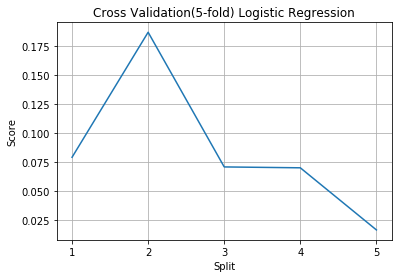

In [41]:
plt.figure()
plt.plot(range(1,6), val_score)
plt.title('Cross Validation(5-fold) Logistic Regression')
plt.xlabel('Split')
plt.ylabel('Score')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

In [42]:
print(confusion_matrix(y_test, y_pred))

[[1039 2364 1037 1476]
 [ 883 3296  995  942]
 [ 654 1939 1495 1827]
 [ 423  994  872 3763]]
